# Common Neighbor Rule in PyC Subgraph (Generalized ER & CFG)

In [2]:
import os
import random
from time import time
import pandas as pd
import numpy as np
import networkx as nx

from utils.graph_creation import *
from utils.common_neighbor_rule import *
from utils.visualization import *
from utils.fileio import *

## Create PyC Subgraph

In [3]:
# fetch and preview the synapses table
pcy_synapses = read_pyc_graph("data/pyc_graph_v185.csv")
pcy_synapses.head()

,segmentation,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,spine_vol,exclude_conn
0,185,1484,1,"[91332, 57836, 1584]",97170491155950710,648518346349539437,"[91369, 57798, 1582]","[91332, 57748, 1584]",97170491155951077,648518346349531254,798,0.133004,0
1,185,2254,1,"[64762, 45414, 711]",89838917557174822,648518346349537978,"[64742, 45419, 708]","[64720, 45430, 708]",89838917557173796,648518346349537300,129,0.016346,0
2,185,3785,1,"[69646, 63086, 721]",91264984138384361,648518346349533058,"[69604, 63106, 721]","[69558, 63120, 721]",90983509161691227,648518346349538715,62,0.020969,0
3,185,3863,1,"[66776, 39946, 1138]",90396382837344883,648518346349539333,"[66750, 39982, 1139]","[66722, 39990, 1139]",90396382837366381,648518346349539806,62,0.018033,0
4,185,4062,1,"[89112, 48970, 2154]",96597662777759466,648518346349523975,"[89162, 48958, 2154]","[89198, 48936, 2154]",96597662777759456,648518346349537716,62,0.008805,0


In [4]:
pcy_synapses = format_synapses(pcy_synapses)

# create the simple directed graph (no self-loops, no multi-edges)
# treat multiple synapses as one connection
pyc_subgraph = synapses_to_connections(pcy_synapses[['pre','post']])
# remove self-loops
g_actual = remove_autapses(edges_to_graph(pyc_subgraph))

In [5]:
print(nx.info(g_actual))

Name: 
Type: DiGraph
Number of nodes: 334
Number of edges: 1738
Average in degree:   5.2036
Average out degree:   5.2036


## Common Neighbor Rule

In [6]:
%%time
# calculate common neighbor stats in the observation
obs_cnr_stats = get_cnr_stats(g_actual)

CPU times: user 8.22 s, sys: 20 ms, total: 8.24 s
Wall time: 8.27 s


- "undir_pair" - number of pairs with [bin] common neighbor
- "dir_spair" - number of pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_ppair" - number of pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_conn" - number of connected pairs with [bin] common neighbor
- "dir_sconn" - number of connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_pconn" - number of connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_uni_sconn" - number of unidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_uni_pconn" - number of unidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "dir_bi_sconn" - number of bidirectionally connected pairs with [bin] common successor (strict, not a predecessor to any)
- "dir_bi_pconn" - number of bidirectionally connected pairs with [bin] common predecessor (strict, not a successor to any)
- "undir_perc" - percentage of pairs with [bin] common neighbor to be connected
- "dir_sperc" - percentage of pairs with [bin] strict common successor to be connected
- "dir_pperc" - percentage of pairs with [bin] strict common predcessor to be connected

In [7]:
obs_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,34324.0,52856.0,39977.0,458.0,1280.0,963.0,1270.0,945.0,10.0,18.0,0.013343,0.024217,0.024089
1,13313.0,1416.0,12189.0,434.0,162.0,526.0,154.0,516.0,8.0,10.0,0.032600,0.114407,0.043154
2,4510.0,714.0,2683.0,310.0,117.0,154.0,109.0,152.0,8.0,2.0,0.068736,0.163866,0.057398
3,1793.0,318.0,618.0,180.0,69.0,49.0,64.0,48.0,5.0,1.0,0.100390,0.216981,0.079288
4,801.0,142.0,117.0,132.0,26.0,11.0,26.0,11.0,0.0,0.0,0.164794,0.183099,0.094017
5,402.0,68.0,22.0,74.0,13.0,4.0,13.0,4.0,0.0,0.0,0.184080,0.191176,0.181818
6,182.0,39.0,5.0,37.0,18.0,0.0,18.0,0.0,0.0,0.0,0.203297,0.461538,0.000000
7,119.0,25.0,0.0,18.0,8.0,0.0,8.0,0.0,0.0,0.0,0.151261,0.320000,0.000000
8,63.0,14.0,0.0,22.0,7.0,0.0,7.0,0.0,0.0,0.0,0.349206,0.500000,0.000000
9,104.0,19.0,0.0,42.0,7.0,0.0,7.0,0.0,0.0,0.0,0.403846,0.368421,0.000000


In [8]:
%%time
s=100 # total 100 samples (100 continous samples)
cfg_cnr_samples = continuous_sample_cnr_GE(g_actual, samples=s, niters=int(1e4))


CPU times: user 15min 51s, sys: 644 ms, total: 15min 52s
Wall time: 16min 2s


In [9]:
cfg_cnr_stats, cfg_cnr_stats_std = cnr_mean_std(cfg_cnr_samples)

In [10]:
cfg_cnr_stats

,undir_pair,dir_spair,dir_ppair,undir_conn,dir_sconn,dir_pconn,dir_uni_sconn,dir_uni_pconn,dir_bi_sconn,dir_bi_pconn,undir_perc,dir_sperc,dir_pperc
0,34105.07,52833.82,39983.50,506.99,1295.87,1041.16,1287.55,1023.67,8.32,17.49,0.014866,0.024527,0.026040
1,13556.27,1451.58,12291.59,451.76,179.74,479.20,171.55,469.70,8.19,9.50,0.033324,0.123801,0.038987
2,4565.89,697.44,2652.91,299.54,105.23,143.85,99.53,140.74,5.70,3.11,0.065597,0.150883,0.054221
3,1796.37,322.43,546.76,186.41,56.90,33.90,53.38,33.17,3.52,0.73,0.103757,0.176518,0.062006
4,792.21,150.65,109.43,108.18,30.96,7.16,28.84,7.02,2.12,0.14,0.136553,0.205286,0.065469
5,380.41,72.73,21.75,63.95,16.33,1.35,15.05,1.34,1.28,0.01,0.168190,0.224482,0.061145
6,190.18,36.31,4.16,35.67,8.90,0.31,8.17,0.29,0.73,0.02,0.187344,0.245160,0.069469
7,99.51,19.90,0.67,22.08,5.07,0.04,4.68,0.04,0.39,0.00,0.221737,0.254937,0.030000
8,54.44,10.63,0.20,12.89,3.15,0.03,2.93,0.03,0.22,0.00,0.237182,0.304037,0.025000
9,70.65,15.51,0.03,19.53,4.85,0.00,4.32,0.00,0.53,0.00,0.274713,0.314253,0.000000


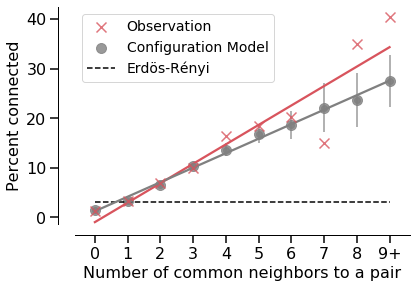

In [11]:
_, two_pr = compute_three_neuron_motif_probabilities_GE(g_actual)
ER_p_null = 1 - 2*two_pr["pr_uni"] - two_pr["pr_bi"]

plot_cnr(obs_cnr_stats, cfg_cnr_stats, cfg_cnr_stats_std, ER_p_null, 
         figsize=(6,4), fontsizes=(16, 16, 16, 14), fname="cnr_GE")

In [12]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), obs_cnr_stats["undir_perc"])

(0.8637575765406493, 9.983128500788891e-05)

In [13]:
# Pearson r^2 and p-value
pearson_r2(np.arange(10), cfg_cnr_stats["undir_perc"])

(0.9948609533603663, 1.91109823294144e-10)

3.3972514771158004 0.0006806638361577241 0.0


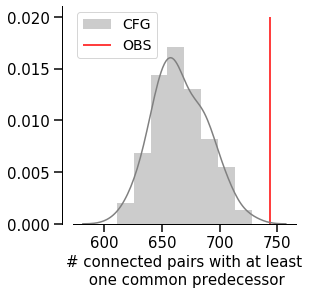

In [14]:
# compare number connected pairs with strict common predecessors in the observation and generalized cfg model
# z-score, p-value (z-test), p-value (sorting)
plot_common_predecessor(cfg_cnr_samples, obs_cnr_stats, figsize=(4,4), fname="commom_pred_GE")

1.4245185702543663 0.15429641331424718 0.05


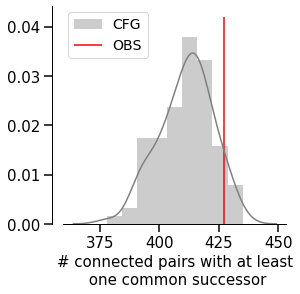

In [15]:
# compare number connected pairs with strict common successor in the observation and generalized cfg model
# z-score, p-value (z-test), p-value (sorting)
plot_common_successor(cfg_cnr_samples, obs_cnr_stats, figsize=(4,4), fname="commom_succ_GE")